1. How does the K-Means Cluster work?

K-means is an algorithm that trains a model that groups similar objects together. The k-means algorithm accomplishes this by mapping each observation in the input dataset to a point in the n-dimensional space (where n is the number of attributes of the observation). For example, your dataset might contain observations of temperature and humidity in a particular location, which are mapped to points (t, h) in 2-dimensional space.

 
Clustering algorithms are unsupervised. In unsupervised learning, labels that might be associated with the objects in the training dataset aren't used.

In k-means clustering, each cluster has a center. During model training, the k-means algorithm uses the distance of the point that corresponds to each observation in the dataset to the cluster centers as the basis for clustering. You choose the number of clusters (k) to create.

For example, suppose that you want to create a model to recognize handwritten digits and you choose the MNIST dataset for training. The dataset provides thousands of images of handwritten digits (0 through 9). In this example, you might choose to create 10 clusters, one for each digit (0, 1, …, 9). As part of model training, the k-means algorithm groups the input images into 10 clusters.

Each image in the MNIST dataset is a 28x28-pixel image, with a total of 784 pixels. Each image corresponds to a point in a 784-dimensional space, similar to a point in a 2-dimensional space (x,y). To find a cluster to which a point belongs, the k-means algorithm finds the distance of that point from all of the cluster centers. It then chooses the cluster with the closest center as the cluster to which the image belongs.

2. How to decide the optimal number of K in the K means Algorithm?

There is a popular method known as elbow method which is used to determine the optimal value of K to perform the K-Means Clustering Algorithm. The basic idea behind this method is that it plots the various values of cost with changing k. As the value of K increases, there will be fewer elements in the cluster

On which k value Inertia is not change much that value k can accepted the curve become asymptote

3. What is inertia, How do we calculate inertia?


Inertia measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster.

A good model is one with low inertia AND a low number of clusters (K). However, this is a tradeoff because as K increases, inertia decreases.

To find the optimal K for a dataset, use the Elbow method; find the point where the decrease in inertia begins to slow. K=3 is the “elbow” of this graph

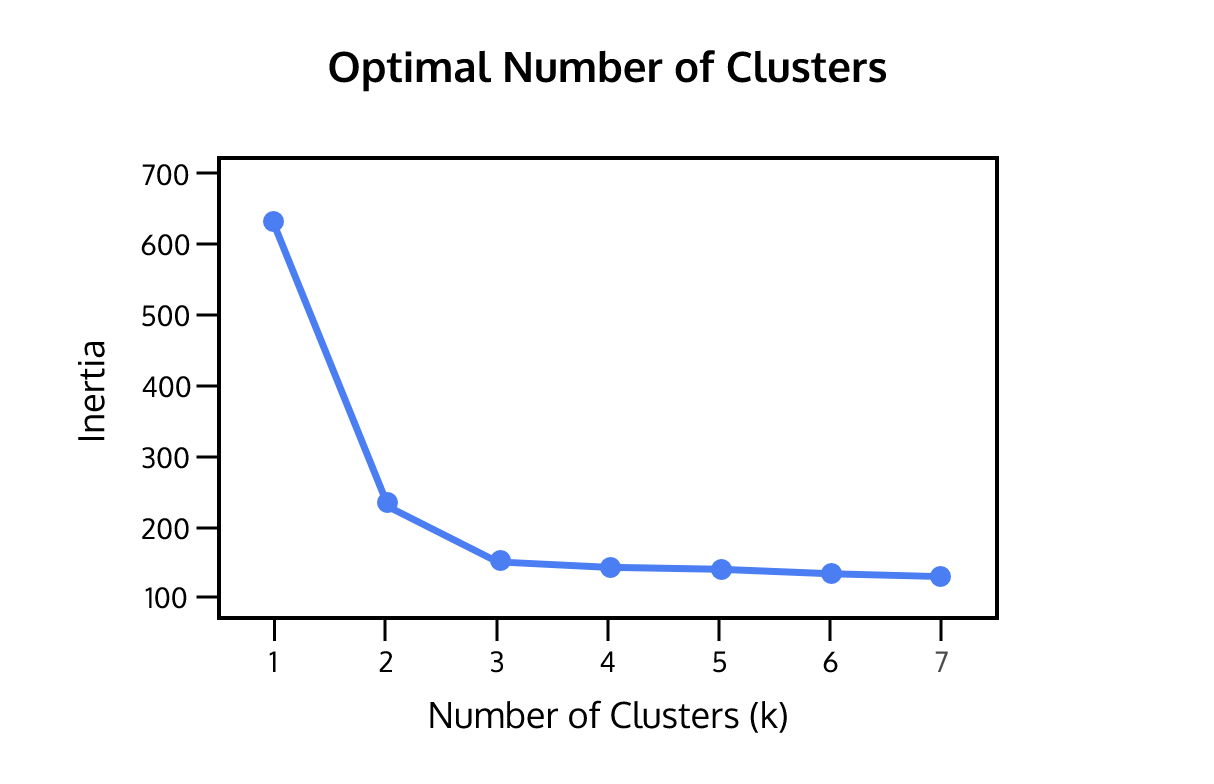

(b - a) / max(a, b)

inertia formula

## 4. What is Hierarchical Clustering ? How does it work?

Hierarchical clustering is another unsupervised machine learning algorithm, which is used to group the unlabeled datasets into a cluster and also known as hierarchical cluster analysis or HCA.

In this algorithm, we develop the hierarchy of clusters in the form of a tree, and this tree-shaped structure is known as the dendrogram.

Sometimes the results of K-means clustering and hierarchical clustering may look similar, but they both differ depending on how they work. As there is no requirement to predetermine the number of clusters as we did in the K-Means algorithm

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
df = pd.read_csv("C:/Users/NOOMAN KHAN/Downloads/cnacer_k_means.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302.0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517.0,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903.0,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301.0,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402.0,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()


In [4]:
df = pd.DataFrame(data = cancer.data , columns = cancer.feature_names )

In [5]:
df["Cancer"] = cancer.target

In [6]:
df["Cancer"].value_counts()

1    357
0    212
Name: Cancer, dtype: int64

In [7]:
 df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Cancer
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [8]:
df.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

In [9]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
Cancer                     0
dtype: int64

In [10]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'Cancer'],
      dtype='object')

In [11]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Cancer
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


<AxesSubplot:>

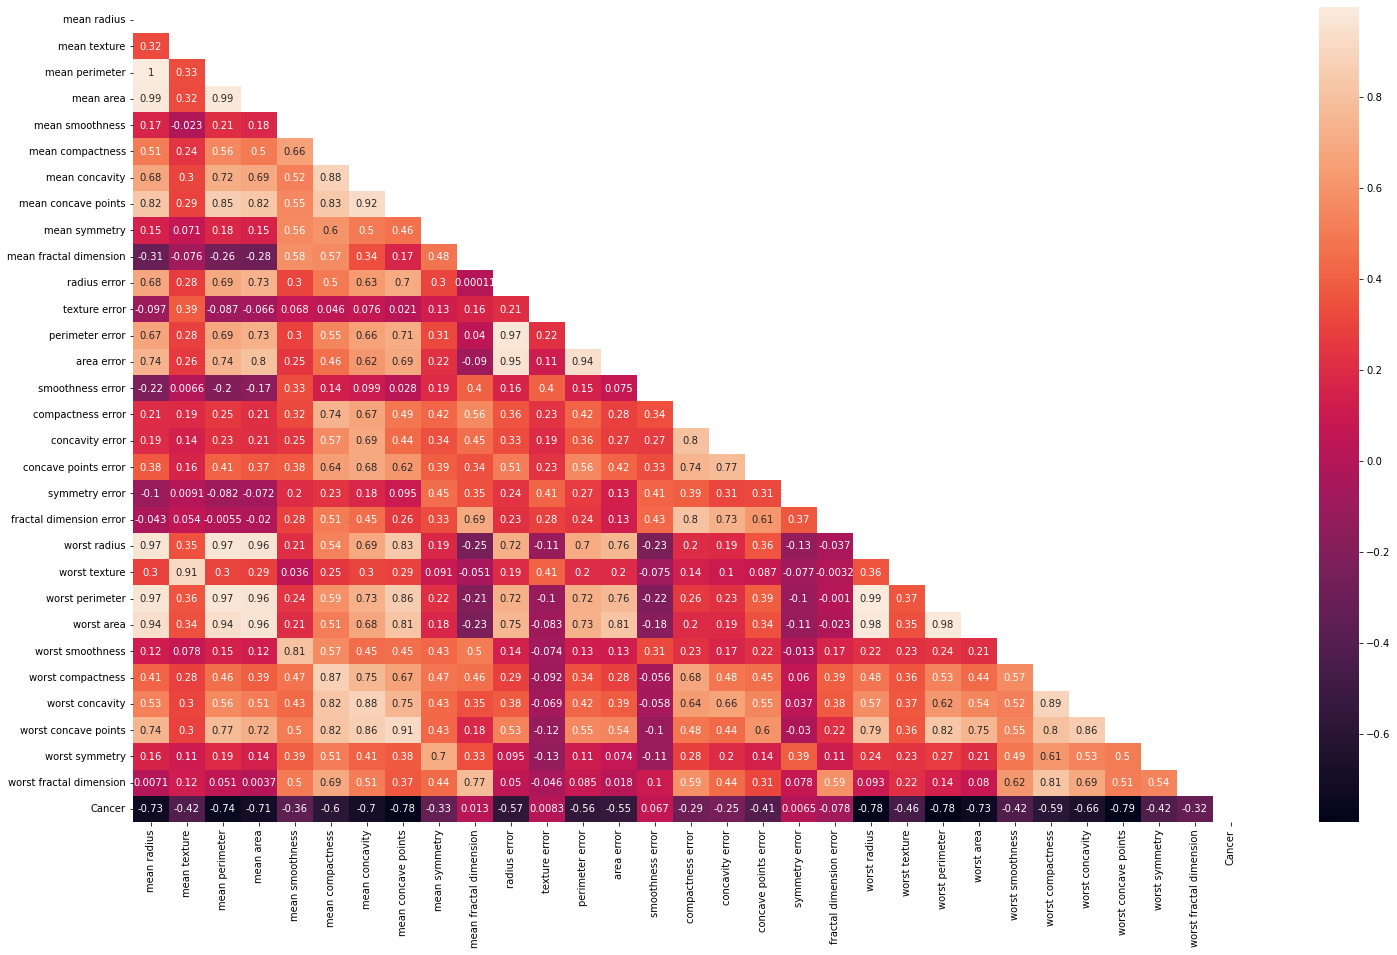

In [12]:
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
plt.figure(figsize = (25,15))
sns.heatmap(df.corr() , annot = True , mask = mask)

In [13]:
df["Cancer"].value_counts()

1    357
0    212
Name: Cancer, dtype: int64

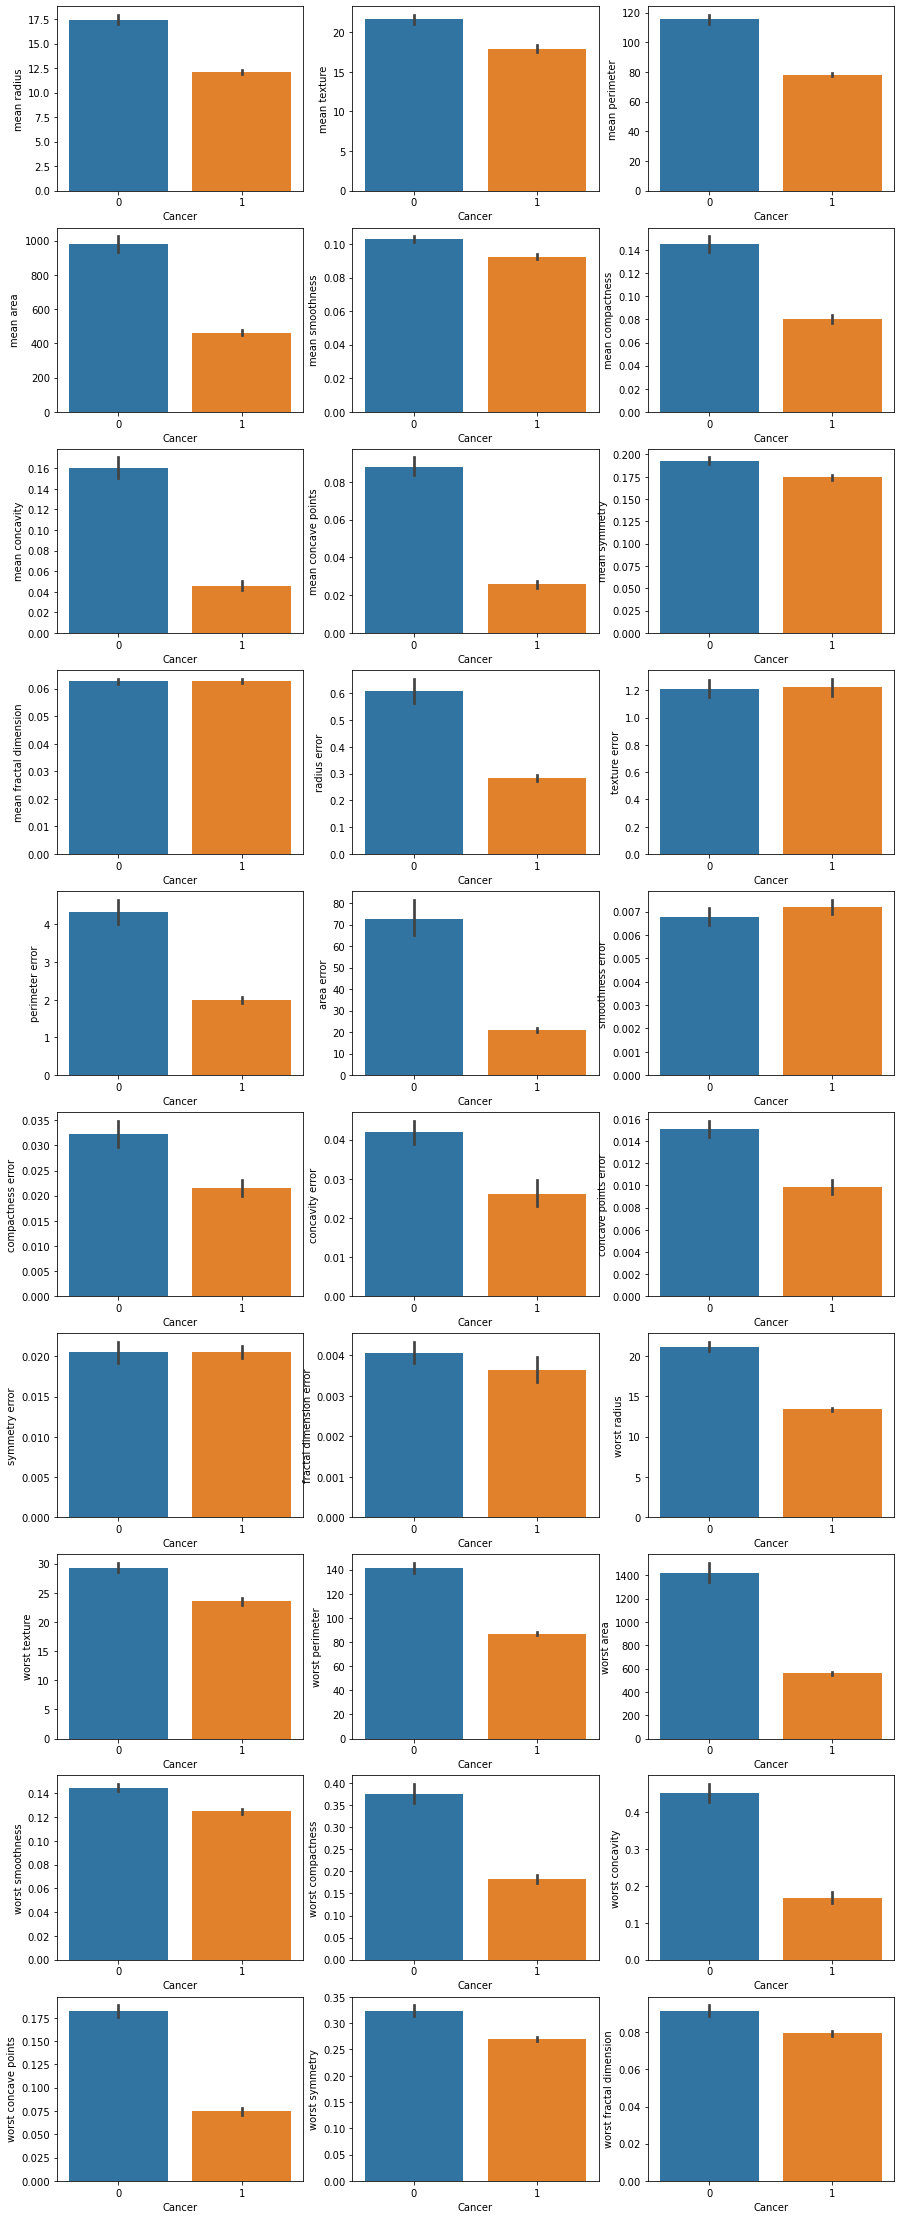

In [14]:
fig , ax = plt.subplots(10,3 , figsize = (15,40))
columns = df.drop("Cancer" , axis = 1).columns
index = 0
for i in range(10):
    for j in range(3):
        sns.barplot(x = df["Cancer"] , y = df[columns[index]] , ax = ax[i][j])
        index+=1

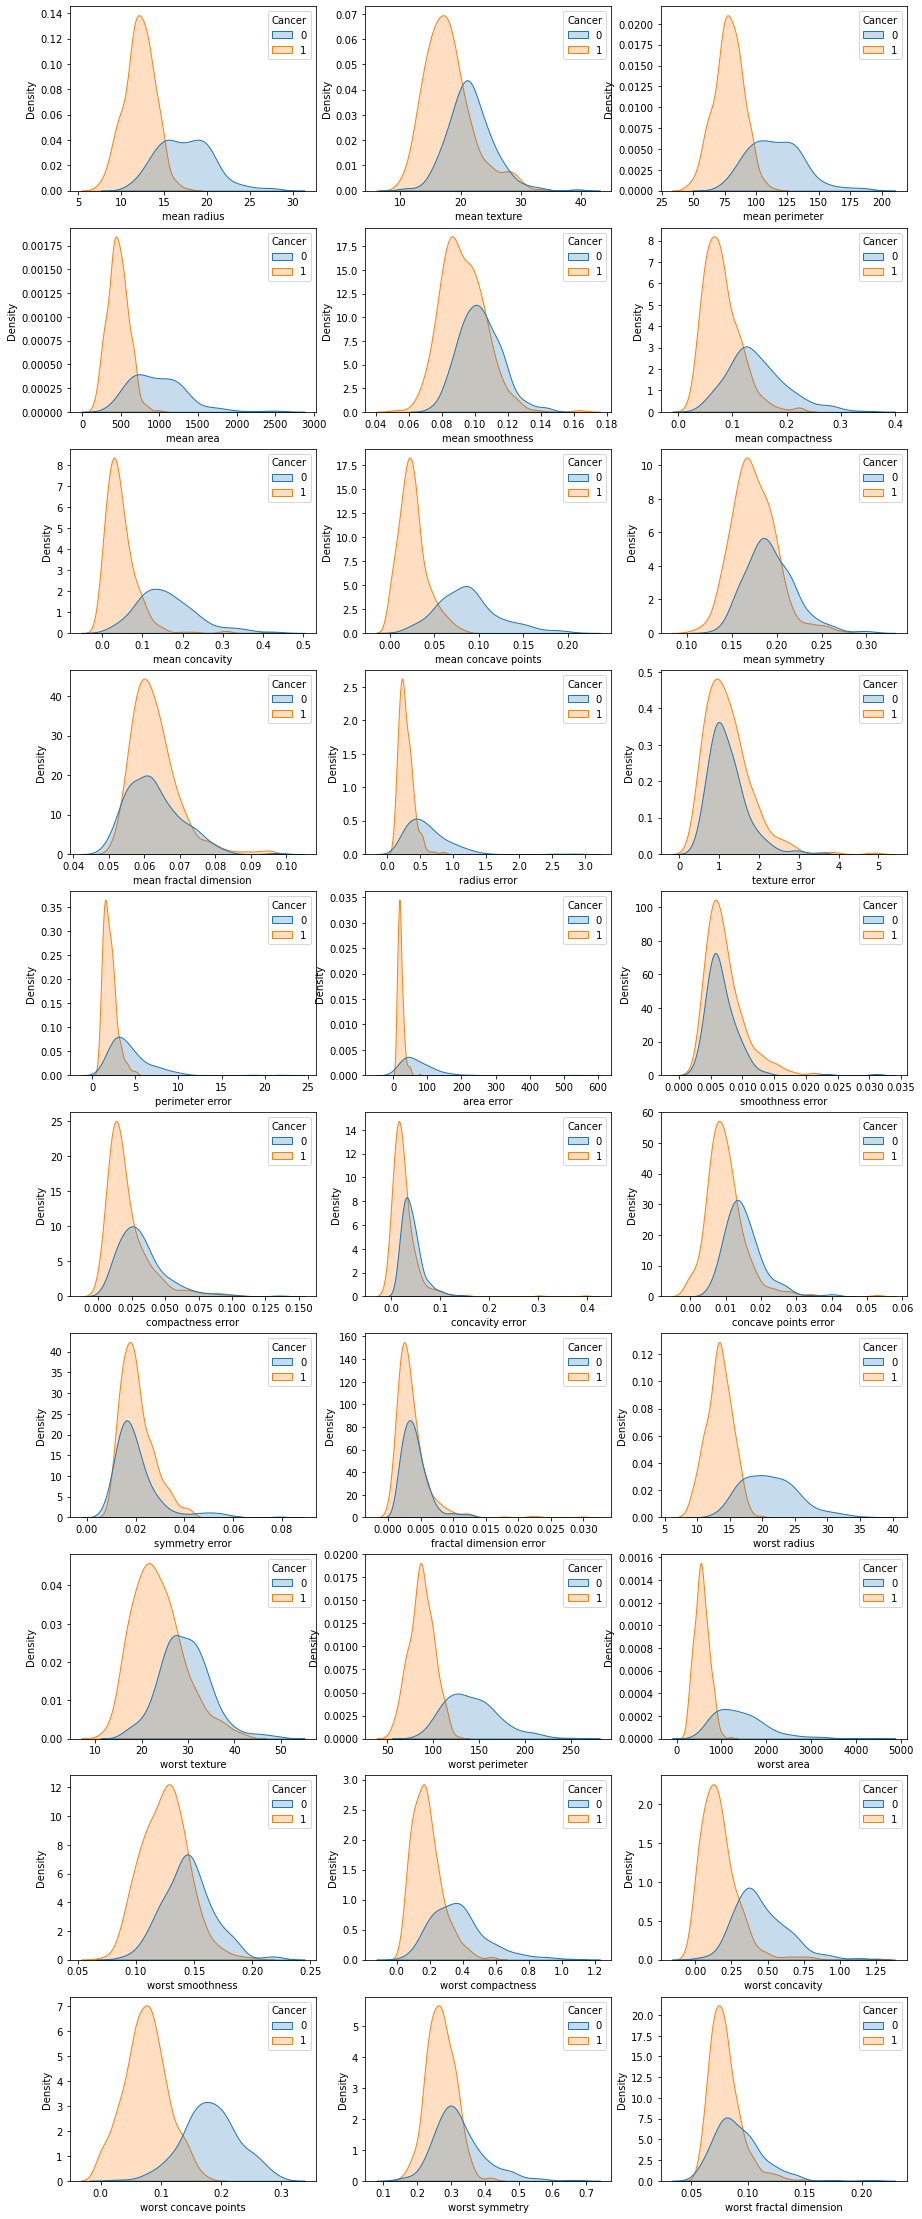

In [15]:
fig , ax = plt.subplots(10,3 , figsize = (15,40))
columns = df.drop("Cancer" , axis = 1).columns
index = 0
for i in range(10):
    for j in range(3):
        sns.kdeplot(hue = df["Cancer"] , x = df[columns[index]] , ax = ax[i][j] , fill = True)
        index+=1

In [16]:
df.corr().iloc[0,-1]

-0.7300285113754563

In [17]:
def correlation(df , theresold):
    less_correlation_feature = []
    matrix = df.corr()
    for i in range(len(matrix)):
        if abs(matrix.iloc[i,-1])<theresold:
            less_correlation_feature.append(df.columns[i])
    return less_correlation_feature 
        
        
        

In [18]:
worst_feature = correlation(df,0.2)
worst_feature

['mean fractal dimension',
 'texture error',
 'smoothness error',
 'symmetry error',
 'fractal dimension error']

In [19]:
df = df.drop(worst_feature , axis = 1)

In [20]:
from sklearn.feature_selection import VarianceThreshold
theresold = VarianceThreshold(threshold = 0)

In [21]:
theresold.fit(df)

VarianceThreshold(threshold=0)

In [22]:
theresold.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [23]:
X = df.drop("Cancer" , axis=1).values
Y = df[["Cancer"]]

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test , Y_train , Y_test = train_test_split(X,Y,test_size = 0.2 , random_state=42)

In [25]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [26]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(100,100,10)]
criterion = [ 'gini', 'entropy', 'log_loss']
max_depth = [int(x) for x in np.linspace(10,100,10)]
min_samples_split = [1,3,5,6,7,8,9,10,11,12]
min_samples_leaf = [1,3,5,6,7,8,9,10,11,12]
max_features = ['sqrt', 'log2', None]
n_jobs = -1

params = {
    'n_estimators':n_estimators,
    'criterion':criterion,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf,
    'max_features':max_features}
    



In [27]:
random_grid = RandomizedSearchCV(estimator = model ,param_distributions=params,n_iter=100,
                                n_jobs = -1 , cv=5 , scoring = "accuracy")

In [28]:
random_grid.fit(X_train , Y_train)

C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
40 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 476, in fit
    trees = Parallel(
  File "C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\NOOMAN KHAN

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 3, 5, 6, 7, 8,
                                                             9, 10, 11, 12],
                                        'min_samples_split': [1, 3, 5, 6, 7, 8,
                                                              9, 10, 11, 12],
                                        'n_estimators': [100, 100, 100, 100,
                                                         100, 100, 100, 100,
                                                         100, 100]},
                   scoring='accuracy')

In [29]:
random_grid.best_params_

{'n_estimators': 100,
 'min_samples_split': 5,
 'min_samples_leaf': 3,
 'max_features': 'sqrt',
 'max_depth': 80,
 'criterion': 'gini'}

In [30]:
RFC = RandomForestClassifier(n_estimators = 100,
 min_samples_split= 8,
 min_samples_leaf = 1,
 max_features = 'log2',
 max_depth = 80,
 criterion = 'log_loss')

In [31]:
RFC.fit(X_train , Y_train)

C:\Users\NOOMAN KHAN\AppData\Local\Temp\ipykernel_9124\3172814850.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFC.fit(X_train , Y_train)


RandomForestClassifier(criterion='log_loss', max_depth=80, max_features='log2',
                       min_samples_split=8)

In [32]:
Y_pred = RFC.predict(X_test)
Y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0])

In [33]:
from sklearn import metrics
metrics.accuracy_score(Y_test , Y_pred)

0.9649122807017544

In [34]:
metrics.confusion_matrix(Y_test , Y_pred)

array([[40,  3],
       [ 1, 70]], dtype=int64)

In [35]:
print(metrics.classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [36]:
Y_pred_proba = RFC.predict_proba(X_test)[::,1]

In [37]:
FPR,TPR,Threshold = metrics.roc_curve(Y_test , Y_pred_proba)

In [38]:
metrics.roc_auc_score(Y_test , Y_pred_proba)

0.9980347199475925

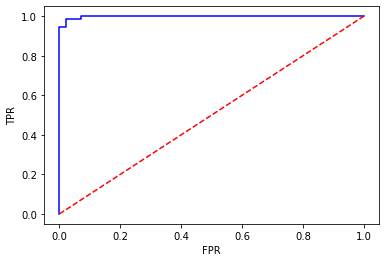

In [39]:
import matplotlib.pyplot as plt
plt.plot(FPR,TPR , color = "blue")
plt.plot(FPR,FPR,color = "red" , linestyle = "--")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [40]:
df1 = df.drop("Cancer" , axis = 1)


## K means Clustring

In [41]:
df1.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,radius error,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,1.0950,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.5435,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.7456,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.4956,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.7572,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [42]:
df1.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,radius error,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.405172,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.277313,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.111500,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.232400,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.324200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.478900,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,2.873000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [43]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [44]:
df1 = sc.fit_transform(df1)

In [45]:
df1

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [46]:
# from sklearn.model_selection import GridSearchCV
# n_clusters = [int(x) for x in np.linspace(1,10,10)]
# init = ['k-means++', 'random']
# max_iter = [int(x) for x in np.linspace(100,1000,10)]

# params = {
#     'n_clusters':n_clusters,
#     'init':init,
#     'max_iter':max_iter
# }



In [47]:
# grid = GridSearchCV(estimator = clusters,param_grid=params,cv=5)


In [48]:
# grid

In [49]:
# grid.fit(df1)

In [50]:
from sklearn.cluster import KMeans
clusters = KMeans()




In [51]:
clusters.fit(df1)

C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


KMeans()

In [52]:
predict = clusters.predict(df1)
predict

array([1, 3, 1, 5, 3, 5, 3, 5, 5, 5, 7, 5, 1, 7, 5, 5, 7, 5, 3, 0, 0, 2,
       5, 3, 3, 1, 5, 3, 5, 3, 1, 5, 5, 3, 5, 5, 5, 2, 7, 5, 7, 0, 1, 5,
       0, 5, 2, 5, 0, 7, 2, 2, 2, 3, 7, 2, 3, 5, 2, 0, 0, 0, 5, 0, 5, 5,
       0, 2, 6, 2, 3, 6, 5, 0, 2, 3, 0, 1, 1, 0, 0, 5, 1, 3, 0, 3, 7, 3,
       7, 0, 7, 7, 2, 2, 5, 3, 2, 2, 2, 0, 7, 0, 7, 0, 0, 5, 0, 2, 1, 7,
       0, 0, 6, 0, 0, 0, 6, 5, 5, 3, 0, 3, 1, 0, 2, 2, 7, 3, 0, 3, 0, 3,
       3, 0, 3, 7, 2, 2, 3, 0, 2, 3, 0, 0, 2, 0, 5, 7, 0, 2, 0, 6, 6, 2,
       0, 2, 3, 7, 2, 2, 0, 3, 1, 7, 3, 2, 2, 3, 3, 2, 0, 7, 5, 2, 2, 2,
       6, 5, 2, 2, 1, 1, 3, 2, 7, 2, 3, 2, 2, 2, 5, 7, 2, 5, 5, 2, 5, 3,
       3, 5, 0, 3, 1, 5, 0, 0, 0, 3, 0, 2, 3, 2, 4, 6, 5, 5, 0, 2, 3, 3,
       2, 0, 0, 5, 2, 0, 2, 0, 7, 5, 5, 7, 7, 3, 2, 7, 1, 3, 7, 3, 2, 2,
       6, 7, 3, 0, 2, 6, 7, 0, 1, 2, 1, 3, 3, 0, 1, 5, 1, 5, 3, 7, 3, 7,
       3, 3, 0, 7, 0, 0, 2, 2, 1, 2, 7, 0, 2, 3, 2, 0, 3, 2, 3, 5, 7, 2,
       7, 2, 6, 2, 6, 0, 0, 2, 2, 2, 2, 2, 2, 2, 1,

In [53]:
# df["Cluster"] = predict

In [54]:
# df.sort_values(by ="Cluster" )

In [55]:
# dff = df[df["Cluster"]==0]

In [56]:
# dff

In [57]:
# len(df.columns)

In [58]:
# df[df["Cluster"]==1]

In [59]:
df1

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [60]:
inertia = []
for i in range(1,31):

    cluster = KMeans(i,init='k-means++')
    cluster.fit(df1)
    inertia.append(cluster.inertia_)
inertia
    
    

C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have

C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


[14225.000000000004,
 8810.794140862676,
 7514.864068327831,
 6800.8828428699935,
 6259.773073799904,
 5919.90830423986,
 5538.010670830942,
 5160.2739587269,
 5019.732620457595,
 4751.784178612684,
 4592.053783078118,
 4427.6994462716575,
 4288.891165168572,
 4108.544871085862,
 4024.1441049132327,
 3931.118136427667,
 3857.6659148309413,
 3764.962718118522,
 3704.603965108318,
 3638.1285855905976,
 3535.6698875848424,
 3479.931481711523,
 3442.4589749445367,
 3377.210068874231,
 3339.240580153384,
 3307.890931517007,
 3221.3761136161306,
 3197.935325433938,
 3126.58959103498,
 3090.903948774769]

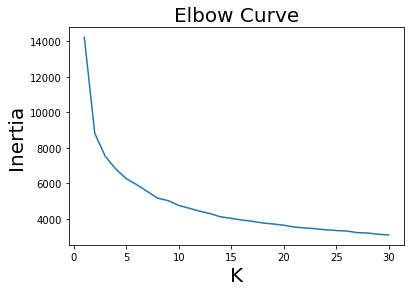

In [61]:
sns.lineplot(x = np.linspace(1,30,30) , y = inertia)
plt.ylabel("Inertia" , fontsize = 20)
plt.xlabel("K" , fontsize = 20)
plt.title("Elbow Curve" , fontsize = 20)
plt.show()

In [62]:
len(df1)

569

After 7 Curve become Asymptot that's why optimum value of cluster is 7

In [63]:
from sklearn import metrics
metrics.silhouette_score(X = df1,labels = predict , metric='euclidean' )

0.17276358349273124

In [64]:
silhouette_score = []
for i in range(1,31):

    cluster = KMeans(n_clusters=i,init='k-means++')
    cluster.fit(df1)
    predict = clusters.predict(df1)
    silhouette_score.append(metrics.silhouette_score(df1,predict,metric='euclidean'))
silhouette_score

C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have

C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


[0.17276358349273124,
 0.17276358349273124,
 0.17276358349273124,
 0.17276358349273124,
 0.17276358349273124,
 0.17276358349273124,
 0.17276358349273124,
 0.17276358349273124,
 0.17276358349273124,
 0.17276358349273124,
 0.17276358349273124,
 0.17276358349273124,
 0.17276358349273124,
 0.17276358349273124,
 0.17276358349273124,
 0.17276358349273124,
 0.17276358349273124,
 0.17276358349273124,
 0.17276358349273124,
 0.17276358349273124,
 0.17276358349273124,
 0.17276358349273124,
 0.17276358349273124,
 0.17276358349273124,
 0.17276358349273124,
 0.17276358349273124,
 0.17276358349273124,
 0.17276358349273124,
 0.17276358349273124,
 0.17276358349273124]